# Credit Card Default Prediction

From the documentation of the dataset, the below details describes the definition of the features.

There are 25 variables:

* ID: ID of each client

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

* default.payment.next.month: Default payment (1=yes, 0=no)

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score,classification_report,roc_auc_score,confusion_matrix,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import BaseEstimator
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")

##Displaying all the columns of the dataframes
pd.pandas.set_option('display.max_columns',None)

In [2]:
#Loading the dataset
dataset=pd.read_csv("credit_card.csv")

In [3]:
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
dataset.shape

(30000, 25)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [7]:
#Checking for null values
dataset.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

--> So, there are no null values in the dataset.

#### Renaming the PAY_0 with PAY_1 and Output feature(default.payment.next.month) with Default_Prediction

In [8]:
dataset.rename(columns={'PAY_0':'PAY_1'},inplace=True)


dataset.rename(columns={'default.payment.next.month':'Default_Prediction'},inplace=True)

In [9]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Prediction
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Exploratory Data Analysis(EDA)

Text(0.5, 1.0, 'Non-Defaulters vs Defaulters')

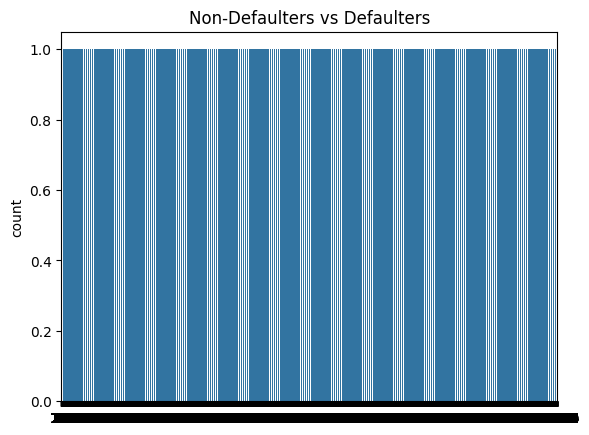

In [10]:
sns.countplot(dataset['Default_Prediction'])
plt.title('Non-Defaulters vs Defaulters')

In [11]:
dataset['Default_Prediction'].value_counts()

Default_Prediction
0    23364
1     6636
Name: count, dtype: int64

--> As per the above outcome, we can say dataset is Imbalanced. And only 22.12% of defaulters present in the dataset. We will keep this in mind and will check later.

In [12]:
#Checking for Categorical features
Categorical_features=[features for features in dataset if dataset[features].dtypes=='object']

In [13]:
Categorical_features

[]

--> Here we have no Categorical features. So, all the features are Numerical features

### Numerical features are two types. 
1. Discrete features 
2. Continuous features

#### 1. Finding the Discreate features

In [14]:
discrete_features=[features for features in dataset.columns if len(dataset[features].unique())<=25]

In [15]:
discrete_features

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'Default_Prediction']

#### 2. Finding the Continuous features

In [16]:
continuous_features=[features for features in dataset.columns if features not in discrete_features]

In [17]:
continuous_features

['ID',
 'LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [18]:
len(dataset['LIMIT_BAL'].unique())

81

### Dealing with Discrete features

#### SEX, EDUCATION, MARRIAGE
Dealing with these 3 features first

* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)

### SEX ♀♂

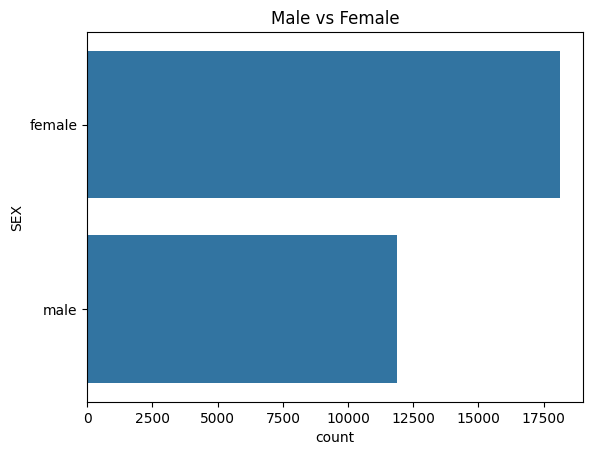

SEX
female    18112
male      11888
Name: count, dtype: int64

In [19]:
#Replacing values in the features with their Actual names
dataset['SEX']=dataset['SEX'].replace({1:'male', 2:'female'})

sns.countplot(dataset['SEX'])
plt.title("Male vs Female")
plt.show()

dataset['SEX'].value_counts()

* Here we have more females in dataset than males in the dataset

In [20]:
def bar_plot(feature):
    plt.figure(figsize=(9,5))
    ax = sns.barplot(x = feature, y = "Default_Prediction", data = dataset, palette ='rocket_r', ci = None)

    plt.xlabel(f'{feature}', fontsize= 12)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)
    plt.show()

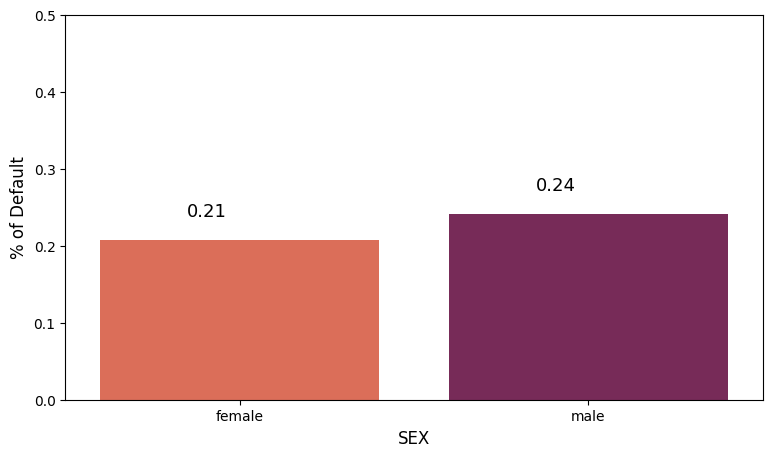

In [21]:
bar_plot('SEX')

* So, from plot we can say Males are more likely to Default next month than Females

### EDUCATION 👨‍🎓

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [22]:
dataset['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

--> Here, we have some other values in Education like {0,4,5,6} which are not in first 3 categories. So, we are replacing all with section 4

In [23]:
dataset['EDUCATION']=dataset['EDUCATION'].replace({0:4,5:4,6:4})

In [24]:
dataset['EDUCATION']=dataset['EDUCATION'].replace({1:'graduate school',2:'university',3:'high school',4:'others'})

<Axes: xlabel='count', ylabel='EDUCATION'>

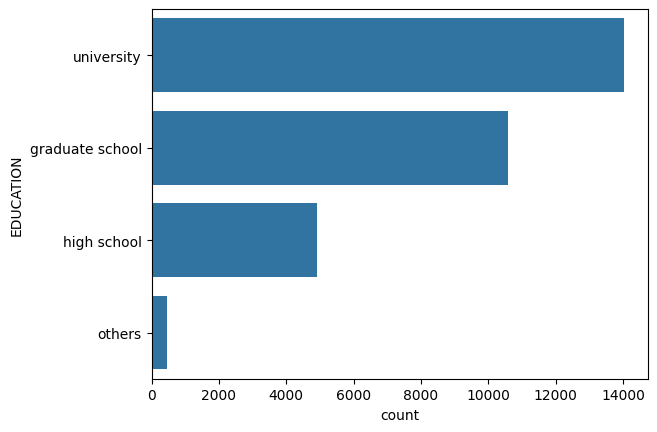

In [25]:
sns.countplot(dataset['EDUCATION'])

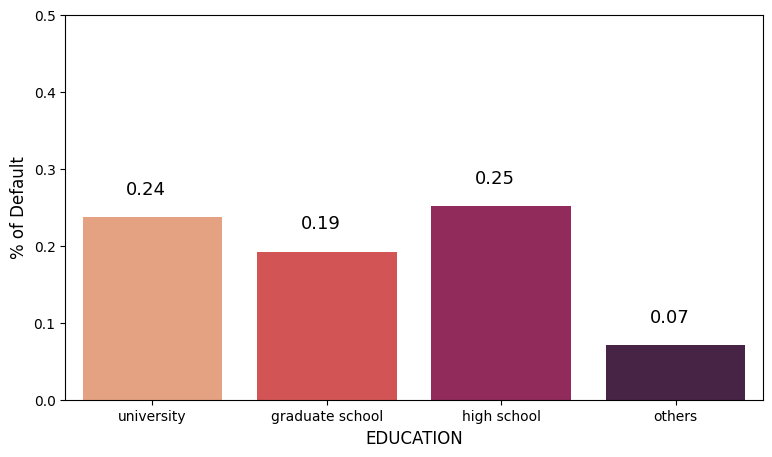

In [26]:
bar_plot('EDUCATION')

* The predominant level of education in our dataset is 'University', followed by 'Grad School', 'High School' and 'Others'.
* From plot, Highschool and University candidates are more likely to Default.

### MARRIAGE 💍

MARRIAGE: Marital status (1=married, 2=single, 3=others)

In [27]:
dataset['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [28]:
dataset['MARRIAGE']=dataset['MARRIAGE'].replace({0:3})
dataset['MARRIAGE']=dataset['MARRIAGE'].replace({1:'married',2:'single',3:'others'})

<Axes: xlabel='count', ylabel='MARRIAGE'>

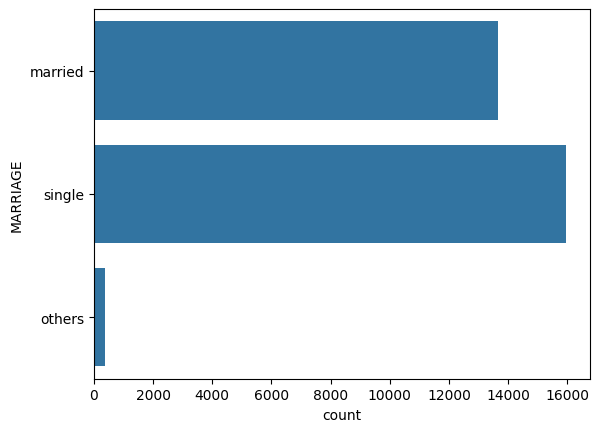

In [29]:
sns.countplot(dataset['MARRIAGE'])

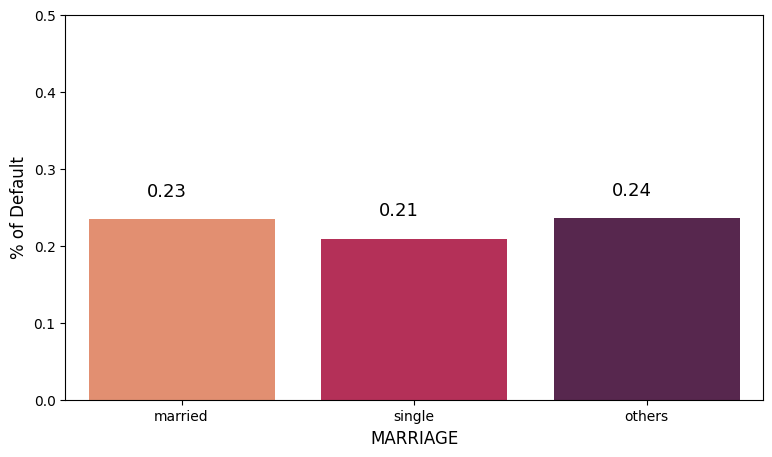

In [30]:
bar_plot('MARRIAGE')

* As expected, most people fall either on the 'Married' or 'Single' category, and Single people are less likely to get Default.

-->Now, we have below 6 Repayment status features to Analyse
### PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6

Repayment status: (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

In [31]:
dataset['PAY_1'].value_counts()

PAY_1
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

In [32]:
dataset['PAY_2'].value_counts()

PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64

--> We are replacing the values -1,-2 with 0.

In [33]:
for i in range(1,7):
    field='PAY_'+str(i)
    dataset[field]=dataset[field].replace({-1:0})
    dataset[field]=dataset[field].replace({-2:0})

In [34]:
dataset['PAY_2'].value_counts()

PAY_2
0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: count, dtype: int64

#### Checking the correction between PAY_X features

<Axes: >

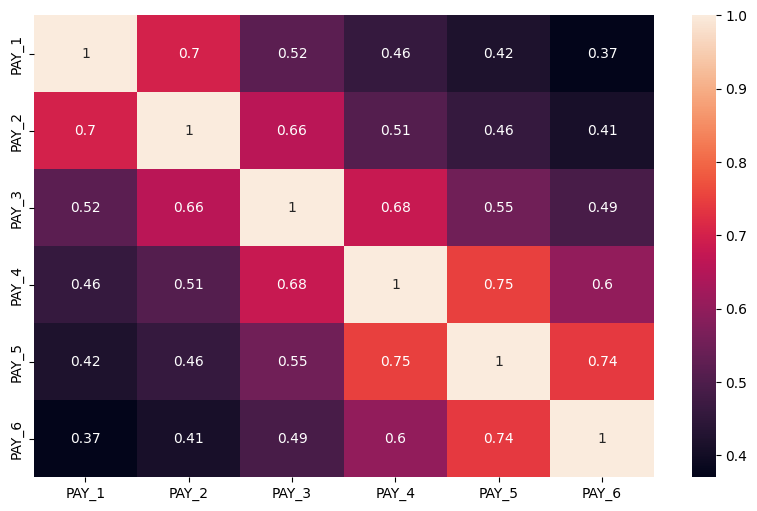

In [35]:
dst = dataset[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].corr().round(2)
plt.figure(figsize=(10,6))
sns.heatmap(dst,annot = True)

* Here, we can find some correlation between PAY_X features but, not all features are internally correlated. Only feature depends partly on previous month feature. Dropping columns here may reduce model performance, so not dropping any columns.

### Dealing with Continuous features

In [36]:
#Dropping the unique ID column
dataset=dataset.drop(columns='ID')

In [37]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Prediction
0,20000.0,female,university,married,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,female,university,single,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,female,university,single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,female,university,married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,male,university,married,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### LIMIT_BAL

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit!

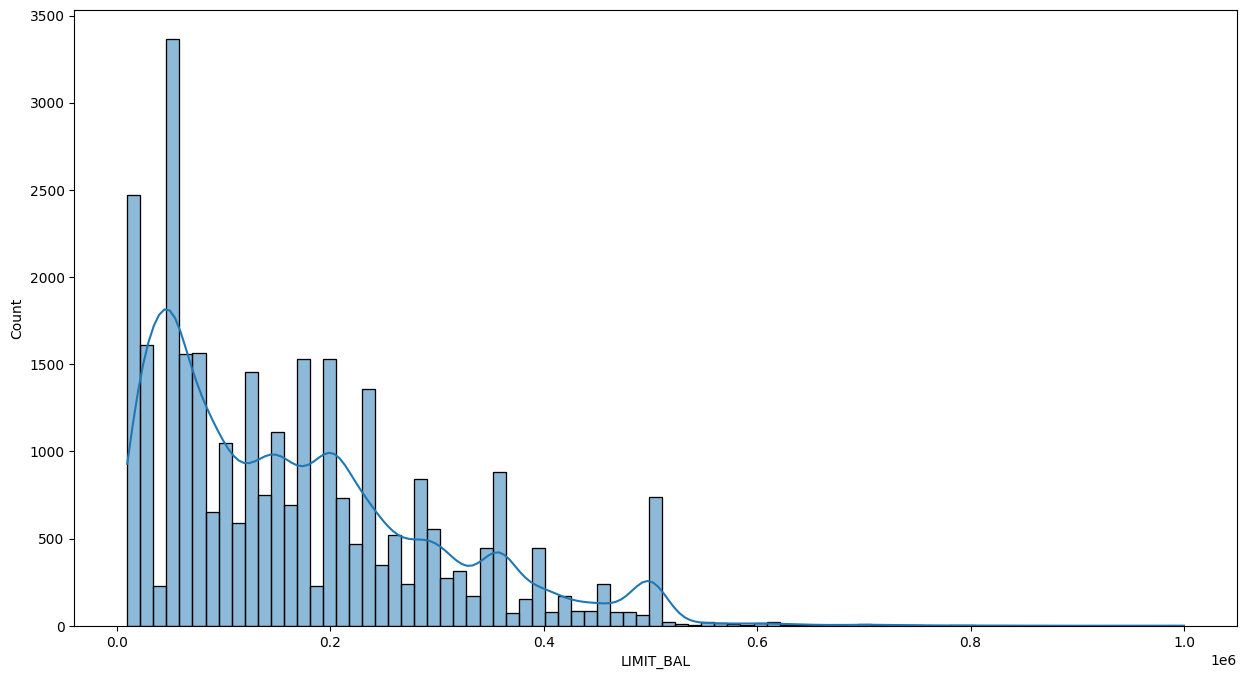

In [38]:
plt.figure(figsize=(15,8))
sns.histplot(x=dataset['LIMIT_BAL'],kde=True)
plt.show()

* Most of the LIMIT_BAL data is concentrated between 0 to 0.4

<Axes: ylabel='LIMIT_BAL'>

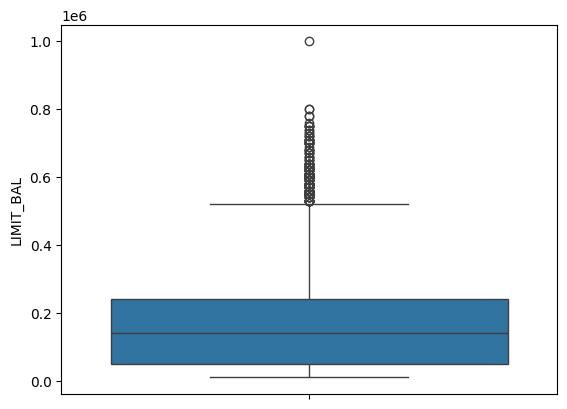

In [39]:
sns.boxplot(dataset['LIMIT_BAL'])

* Finding the outliers

#### Finding Outliers

In [40]:
outliers = []
def Finding_outliers(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [41]:
outliers = Finding_outliers(dataset['LIMIT_BAL'])

In [42]:
len(outliers)

167

#### Handling Outliers

We can handle outliers in 3 methods.
1. Removing/deleting the outliers
2. Replacing them with mean/median
3. Quantile based flooring and capping

* We are not Deleting any of the records, since this was a imbalanced dataset, it may effect model performance. Let's check with both the cases 2 & 3 and decide which one to consider for training

In [43]:
median = np.median(dataset['LIMIT_BAL'])# Replace with median
for i in outliers:
    c = np.where(dataset['LIMIT_BAL']==i, median, dataset['LIMIT_BAL'])
print("New array: ",c)
#dataset['LIMIT_BAL']=c

New array:  [ 20000. 120000.  90000. ...  30000.  80000.  50000.]


<Axes: >

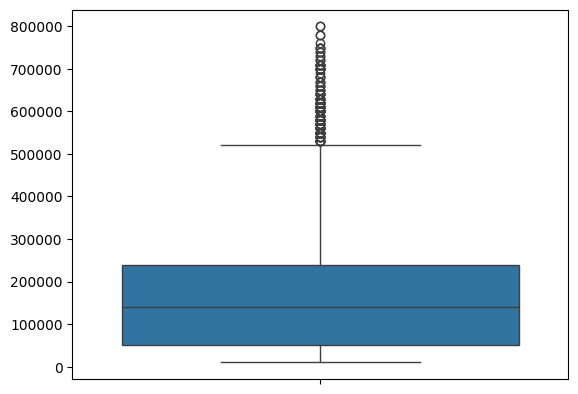

In [44]:
sns.boxplot(c)

In [45]:
dataset['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [46]:
# Computing 10th, 90th percentiles and replacing the outliers
sample=dataset['LIMIT_BAL']
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print(tenth_percentile, ninetieth_percentile)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
print("New array:",b)

30000.0 360000.0
New array: [ 30000. 120000.  90000. ...  30000.  80000.  50000.]


In [47]:
len(b)

30000

<Axes: >

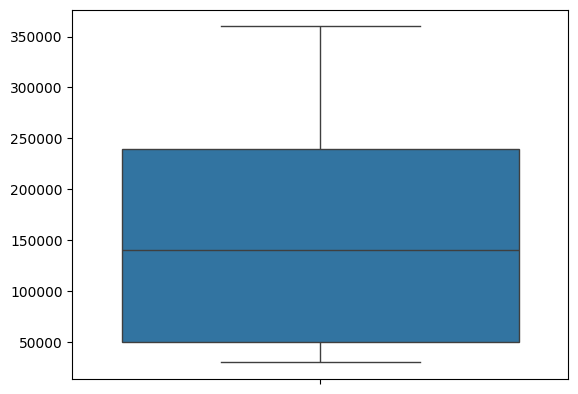

In [48]:
sns.boxplot(b)

In [49]:
# Considering option2 =>
dataset['LIMIT_BAL']=c
dataset['LIMIT_BAL']

0         20000.0
1        120000.0
2         90000.0
3         50000.0
4         50000.0
           ...   
29995    220000.0
29996    150000.0
29997     30000.0
29998     80000.0
29999     50000.0
Name: LIMIT_BAL, Length: 30000, dtype: float64

* We can also convert these values to bins to get clear picture of how it relates to Defauters..

In [50]:
dataset['Limit_bin'] = pd.cut(dataset['LIMIT_BAL'],bins=[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000],labels = ['5000-50000', '50000-100000','100000-150000','150000-200000','200000-300000','300000-400000','400000-500000','500000-1100000'])

In [51]:
dataset['Limit_bin'].value_counts()

Limit_bin
5000-50000        7676
200000-300000     5059
50000-100000      4822
150000-200000     3978
100000-150000     3903
300000-400000     2759
400000-500000     1598
500000-1100000     205
Name: count, dtype: int64

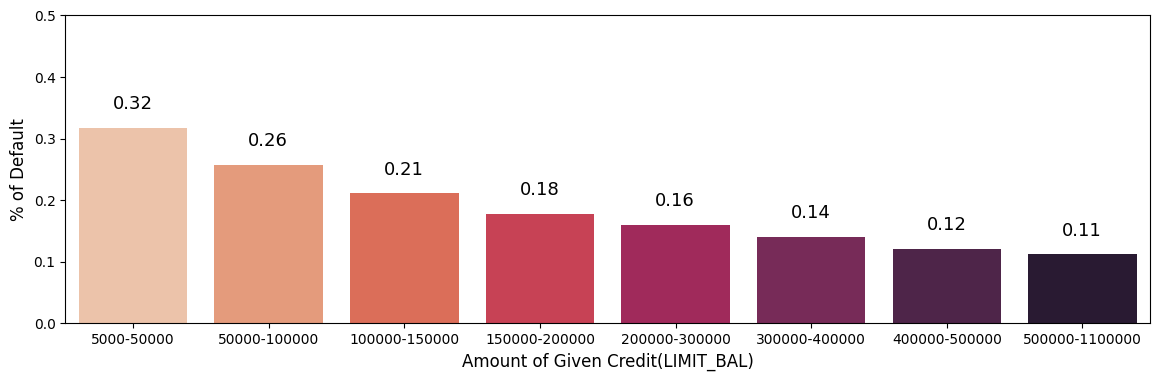

In [52]:
plt.figure(figsize=(14,4))
ax = sns.barplot(x = "Limit_bin", y = "Default_Prediction", data = dataset, palette = 'rocket_r', ci = None)
plt.xlabel("Amount of Given Credit(LIMIT_BAL)", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)
plt.show()

* Now, we got the clear picture that there is a significant rate of default (over 30%) from customers with 50k or less of credit limit. 
* We also can say that the higher the limit, the lower is the chance of defaulting.

### AGE 👴

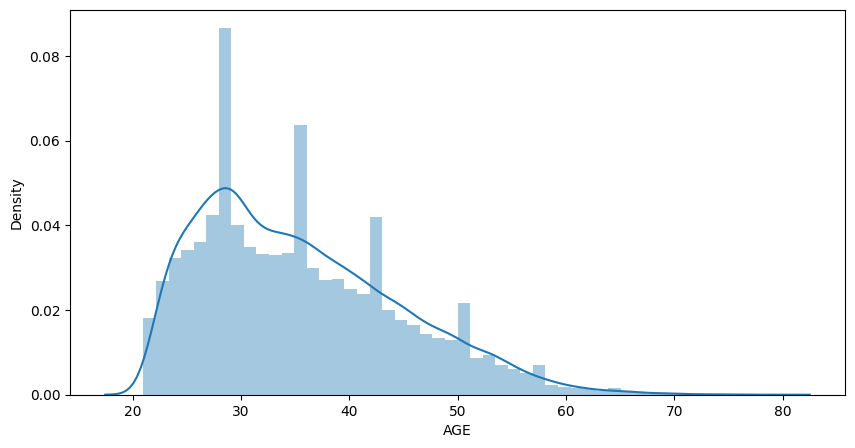

In [53]:
plt.figure(figsize=(10,5))
sns.distplot(dataset['AGE'])
plt.show()

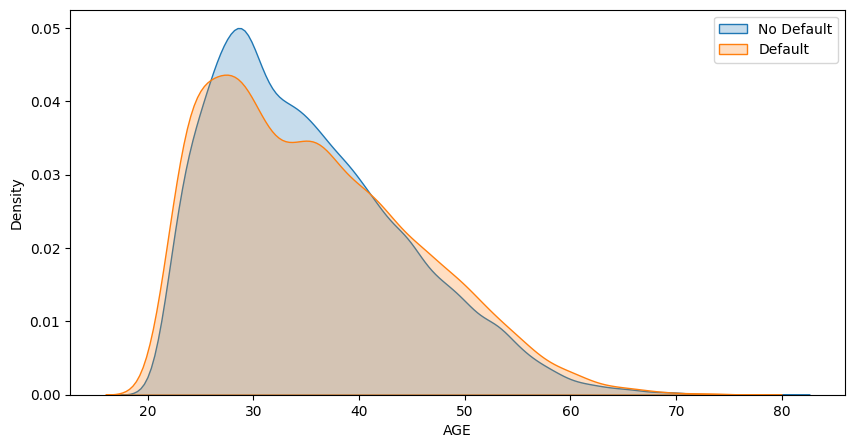

In [54]:
plt.figure(figsize=(10,5))

sns.kdeplot(dataset.loc[(dataset['Default_Prediction'] == 0), 'AGE'], label = 'No Default', shade = True)
sns.kdeplot(dataset.loc[(dataset['Default_Prediction'] == 1), 'AGE'], label = 'Default', shade = True)
plt.legend()
plt.show()

* From plots, we can say Age feature is skewed and most people Age lies between range 25 to 40.

--> we will divide our AGE in bins and check the percentage of default in each age group.

In [55]:
dataset['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [56]:
dataset['Age_bin'] = pd.cut(dataset['AGE'], bins = [20, 25, 30, 35, 40, 50, 60, 80],labels=['20-25','25-30','30-35','35-40','40-50','50-60','60-80'])

In [57]:
dataset['Age_bin'].value_counts()

Age_bin
25-30    7142
40-50    6005
30-35    5796
35-40    4917
20-25    3871
50-60    1997
60-80     272
Name: count, dtype: int64

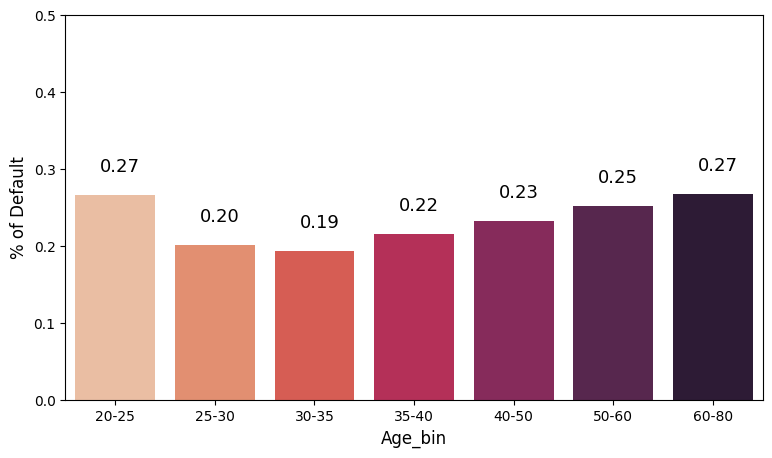

In [58]:
bar_plot('Age_bin')

* The lowest chances of default are registered around 30-35 years old, while the highest occur at the extremes (20-25 and 60+).

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We need to find some one to one relations between the above features..

### BILL_AMT (1-6)

Amount of bill statement in September to April, 2005 (NT dollar)

In [59]:
dataset[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


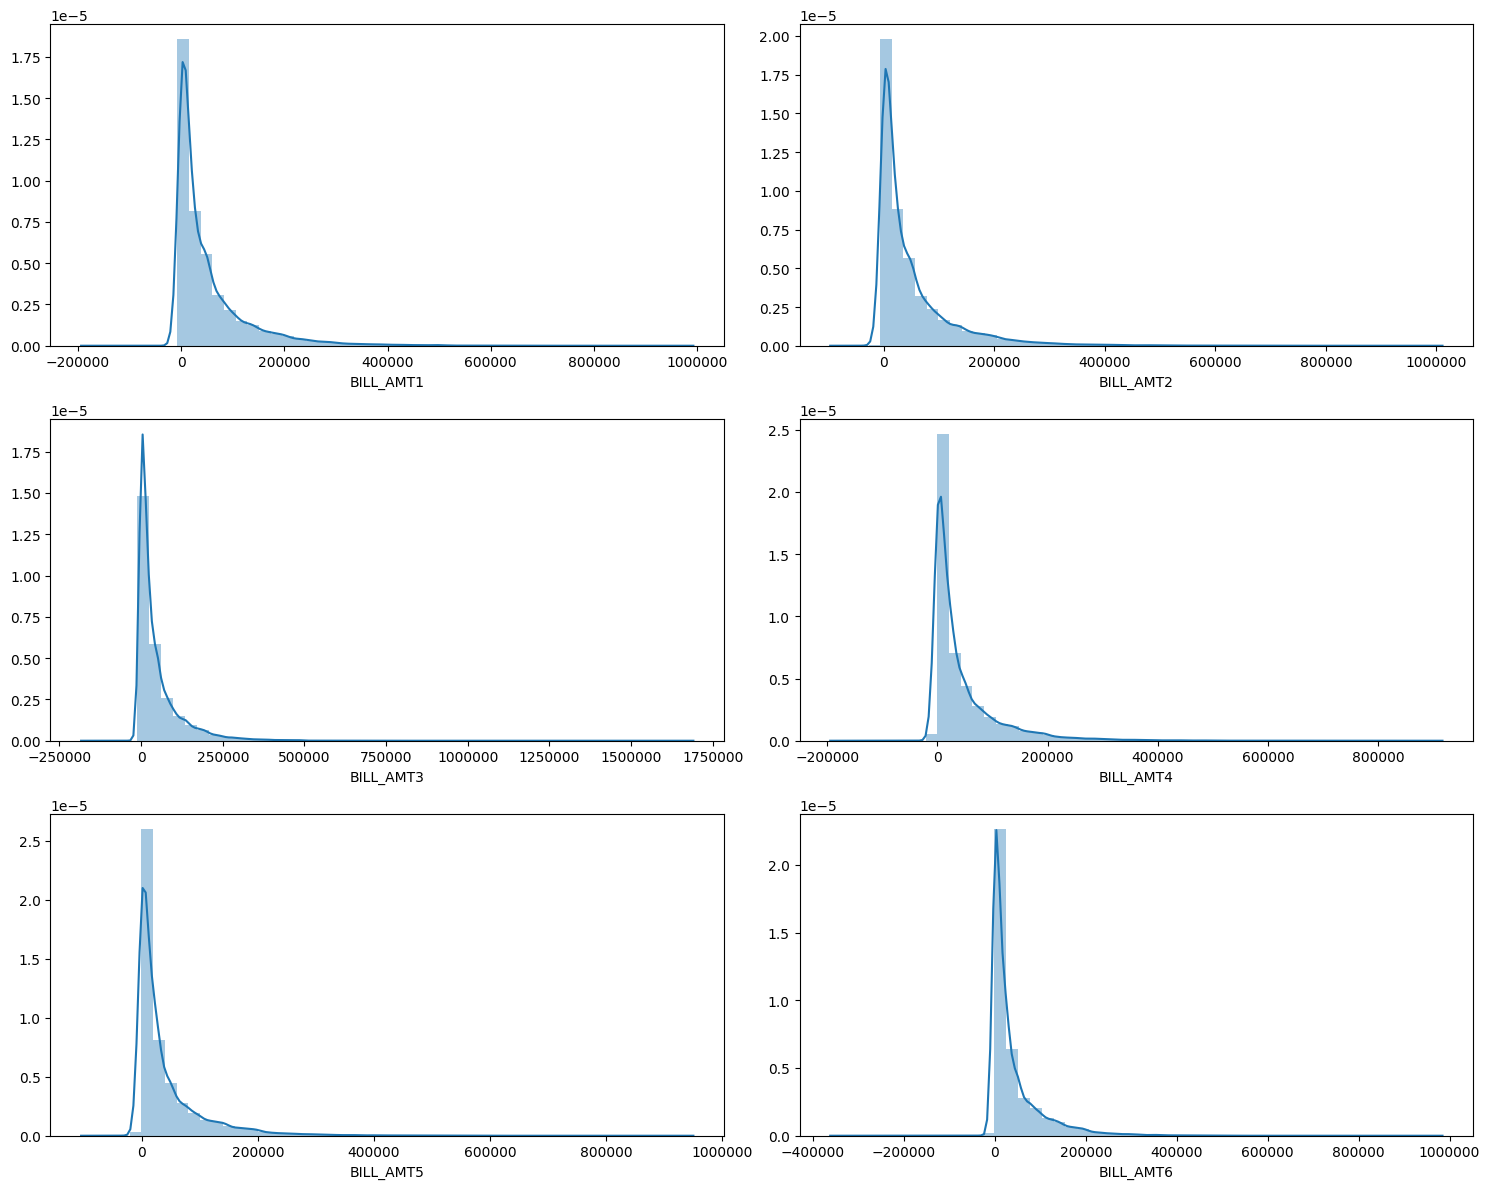

In [60]:
# We will be analysing the features BILL_AMT with various plots
bill_amount = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))
for i,col in enumerate(bill_amount):    
    plt.subplot(3,2,i + 1)
    sns.distplot(dataset.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x')   
    plt.ylabel('')
    plt.tight_layout()
plt.show()

In [61]:
dataset['BILL_AMT1_bin'] = dataset['BILL_AMT1'].copy()
dataset['BILL_AMT2_bin'] = dataset['BILL_AMT2'].copy()
dataset['BILL_AMT3_bin'] = dataset['BILL_AMT3'].copy()
dataset['BILL_AMT4_bin'] = dataset['BILL_AMT4'].copy()
dataset['BILL_AMT5_bin'] = dataset['BILL_AMT5'].copy()
dataset['BILL_AMT6_bin'] = dataset['BILL_AMT6'].copy()

In [62]:
bill_amtx_bins = ['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin']

for i, col in enumerate (bill_amtx_bins):
    dataset[col] = pd.cut(dataset[bill_amount[i]],bins=[-350000,-1,0,25000, 75000, 200000, 2000000],labels=['0<', '=0', '0-25k', '25k-75k', '75k-200k', '>200k'])

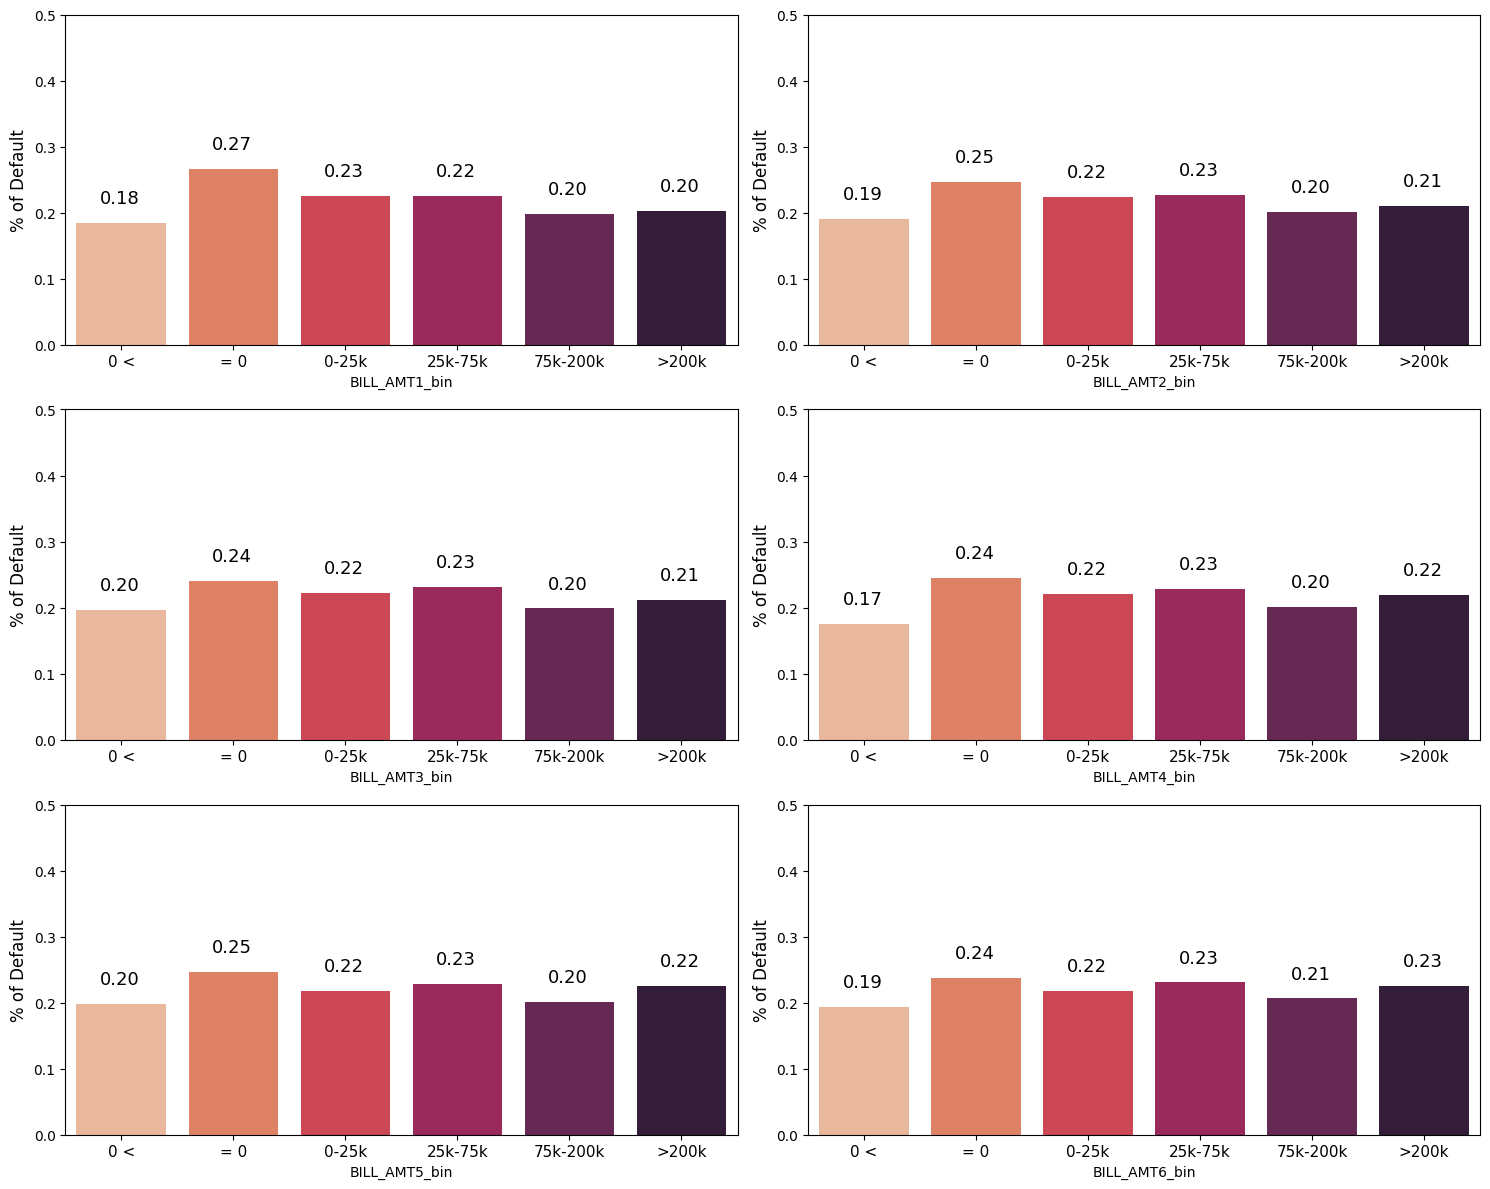

In [63]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default_Prediction", data = dataset, palette = 'rocket_r', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)    
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

plt.show()

* Those who have a negative bill statement have a lower chance of default than the rest. What stands out is that there is a little higher chance of default for those who didn't have a bill in the previous months.

#### Checking the correction between BILL_AMTX features

<Axes: >

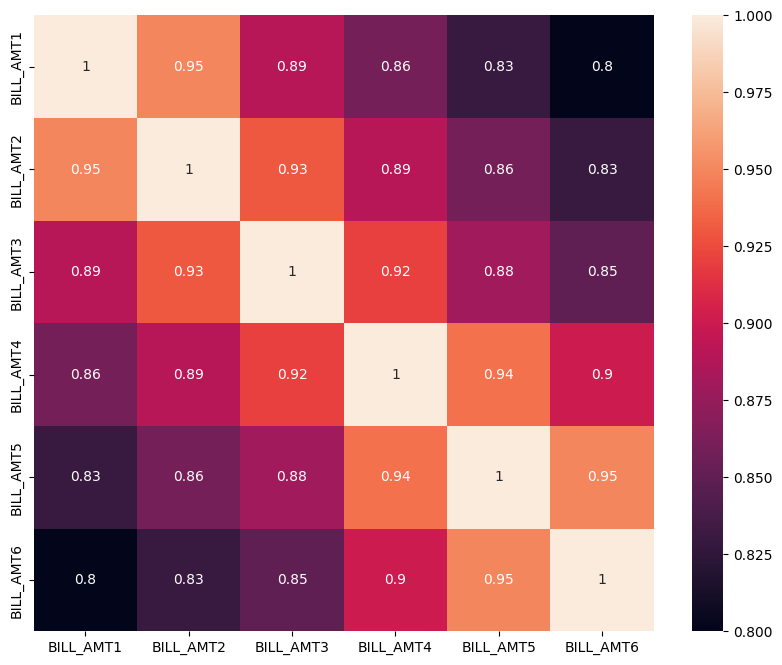

In [64]:
dst = dataset[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].corr().round(2)
plt.figure(figsize=(10,8))
sns.heatmap(dst,annot = True)

* We could see, there is high correlation between the BILL_AMTX features. So, dropping the last 5 BILL_AMT features.

In [65]:
dataset=dataset.drop(columns=['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])

### PAY_AMT (1-6)

Amount of previous payment in September to April, 2005 (NT dollar)

In [66]:
dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


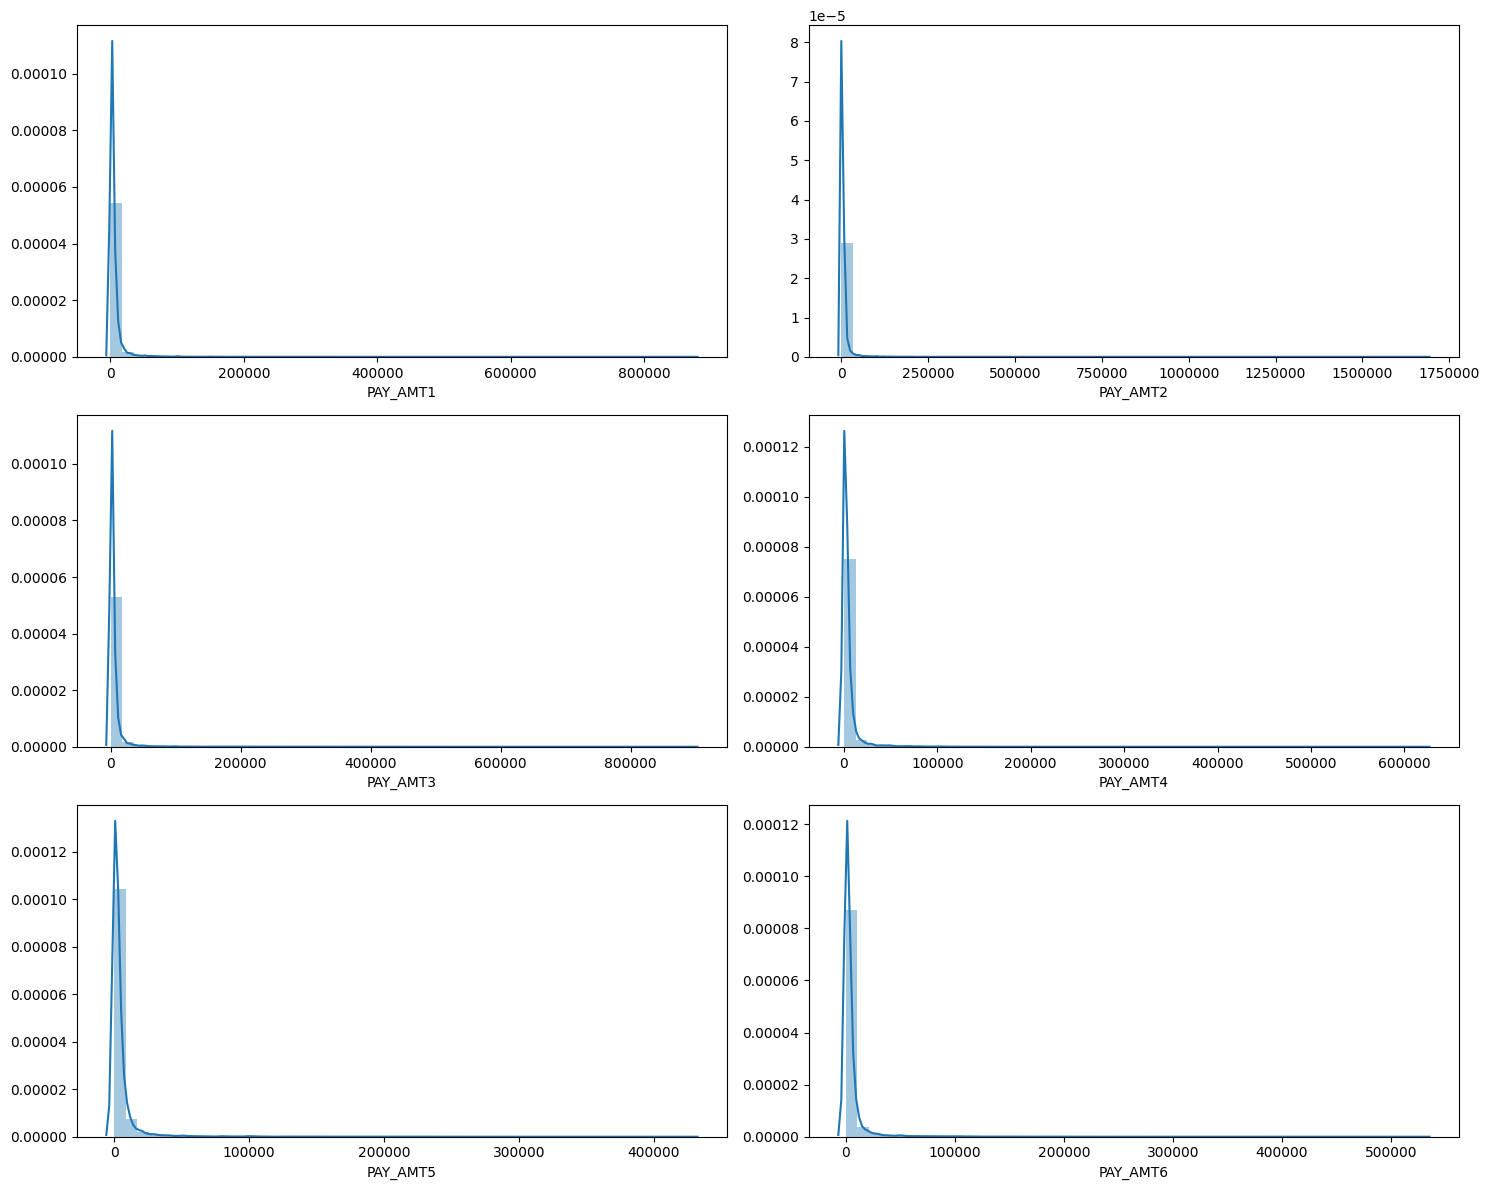

In [67]:
pay_amount = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(15,12))
for i,col in enumerate(pay_amount):    
    plt.subplot(3,2,i + 1)
    sns.distplot(dataset.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x')
    plt.ylabel('')
    plt.tight_layout()
plt.show()

<Axes: ylabel='PAY_AMT1'>

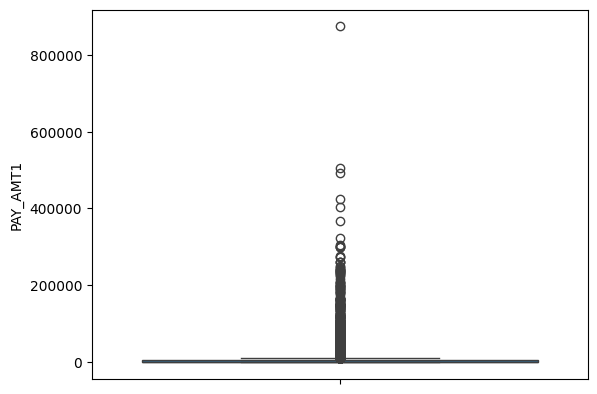

In [68]:
sns.boxplot(dataset['PAY_AMT1'])

In [69]:
dataset['PAY_AMT1_bin'] = dataset['PAY_AMT1'].copy()
dataset['PAY_AMT2_bin'] = dataset['PAY_AMT2'].copy()
dataset['PAY_AMT3_bin'] = dataset['PAY_AMT3'].copy()
dataset['PAY_AMT4_bin'] = dataset['PAY_AMT4'].copy()
dataset['PAY_AMT5_bin'] = dataset['PAY_AMT5'].copy()
dataset['PAY_AMT6_bin'] = dataset['PAY_AMT6'].copy()

In [70]:
pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, col in enumerate (pay_amtx_bins):
    dataset[col] = pd.cut(dataset[pay_amount[i]],bins=[-1, 0, 25000, 50000, 100000, 2000000],labels=['0<', '0-25k', '25k-50k', '50k-100k', '100k-2000k'])

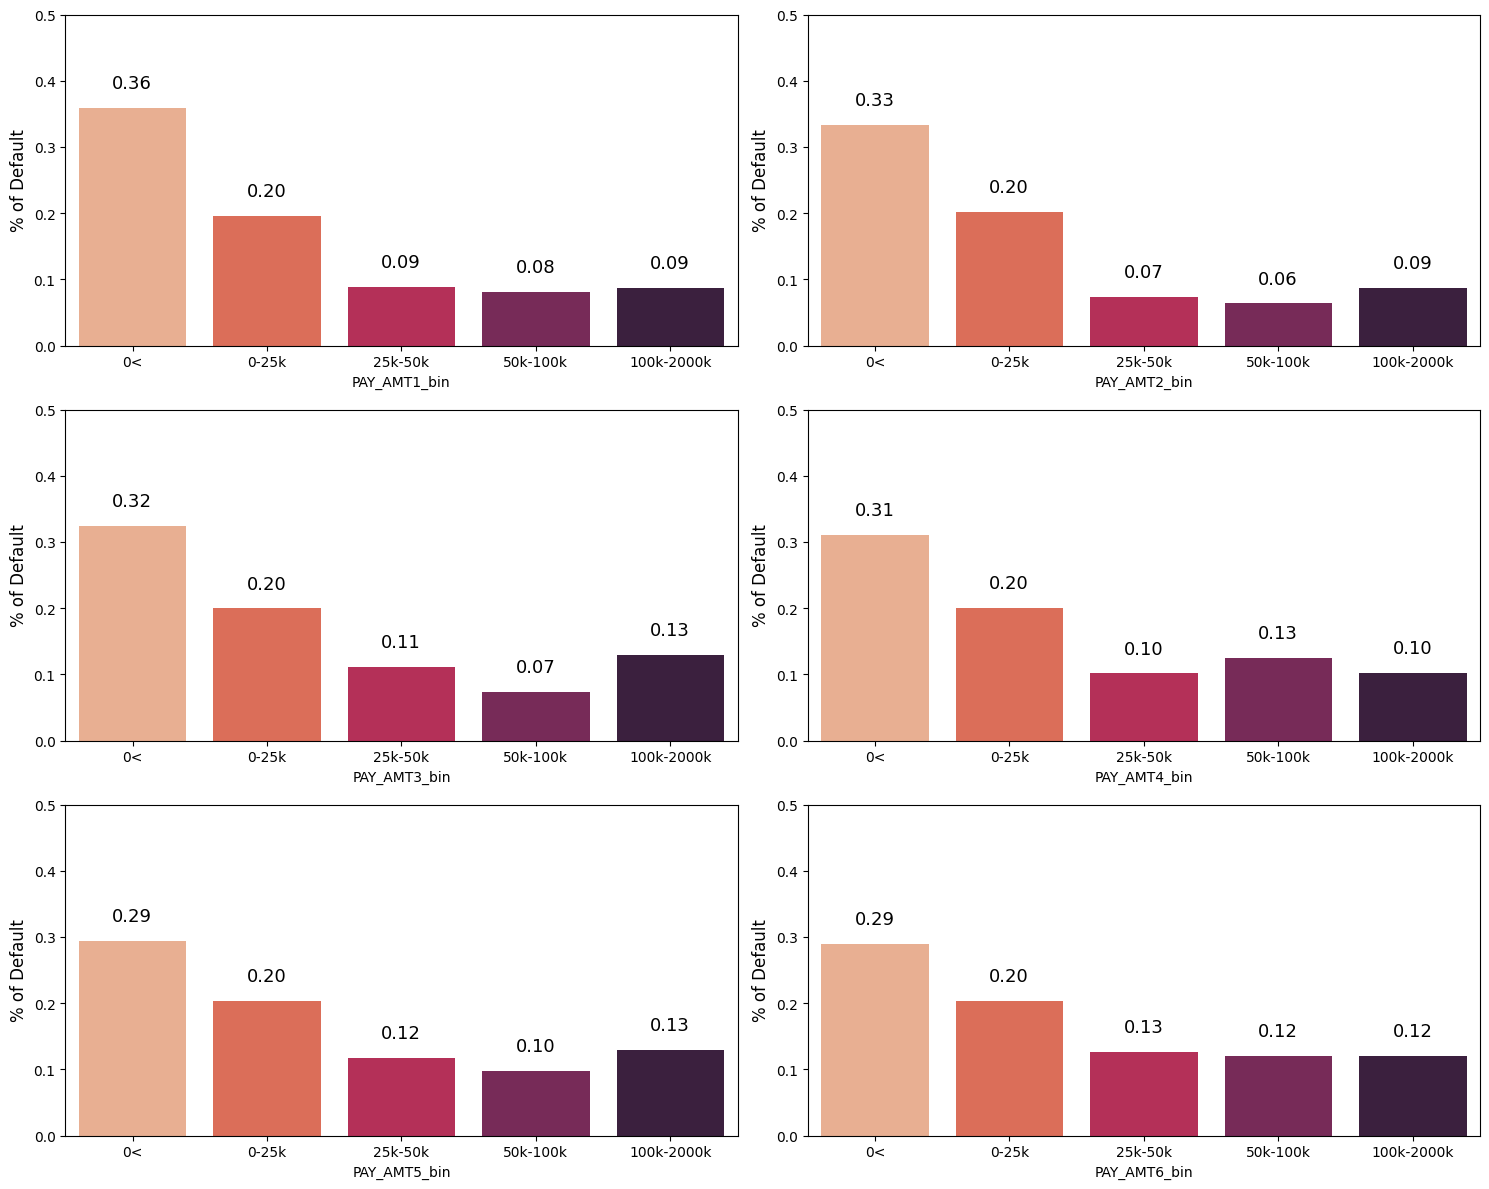

In [71]:
plt.figure(figsize=(15,12))
for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default_Prediction", data = dataset, palette = 'rocket_r', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)
plt.show()

* There is a higher default rate among those who paid nothing in previous months and lower rates among those paid over 25k of NT dollars.

#### Checking the correlation between PAY_AMTX features

<Axes: >

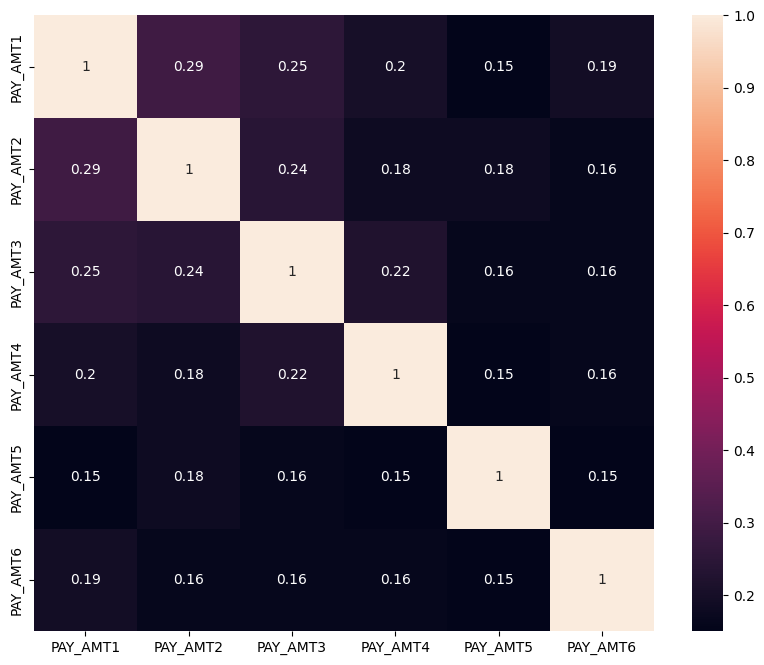

In [72]:
dst = dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].corr().round(2)
plt.figure(figsize=(10,8))
sns.heatmap(dst,annot = True)

* Here, we can see there is no correlation between PAY_AMTX features. So, not dropping any columns

In [73]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Prediction,Limit_bin,Age_bin,BILL_AMT1_bin,BILL_AMT2_bin,BILL_AMT3_bin,BILL_AMT4_bin,BILL_AMT5_bin,BILL_AMT6_bin,PAY_AMT1_bin,PAY_AMT2_bin,PAY_AMT3_bin,PAY_AMT4_bin,PAY_AMT5_bin,PAY_AMT6_bin
0,20000.0,female,university,married,24,2,2,0,0,0,0,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1,5000-50000,20-25,0-25k,0-25k,0-25k,=0,=0,=0,0<,0-25k,0<,0<,0<,0<
1,120000.0,female,university,single,26,0,2,0,0,0,2,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,100000-150000,25-30,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k,0<,0-25k,0-25k,0-25k,0<,0-25k
2,90000.0,female,university,single,34,0,0,0,0,0,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,50000-100000,30-35,25k-75k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k
3,50000.0,female,university,married,37,0,0,0,0,0,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,5000-50000,35-40,25k-75k,25k-75k,25k-75k,25k-75k,25k-75k,25k-75k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k
4,50000.0,male,university,married,57,0,0,0,0,0,0,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,5000-50000,50-60,0-25k,0-25k,25k-75k,0-25k,0-25k,0-25k,0-25k,25k-50k,0-25k,0-25k,0-25k,0-25k


<Axes: >

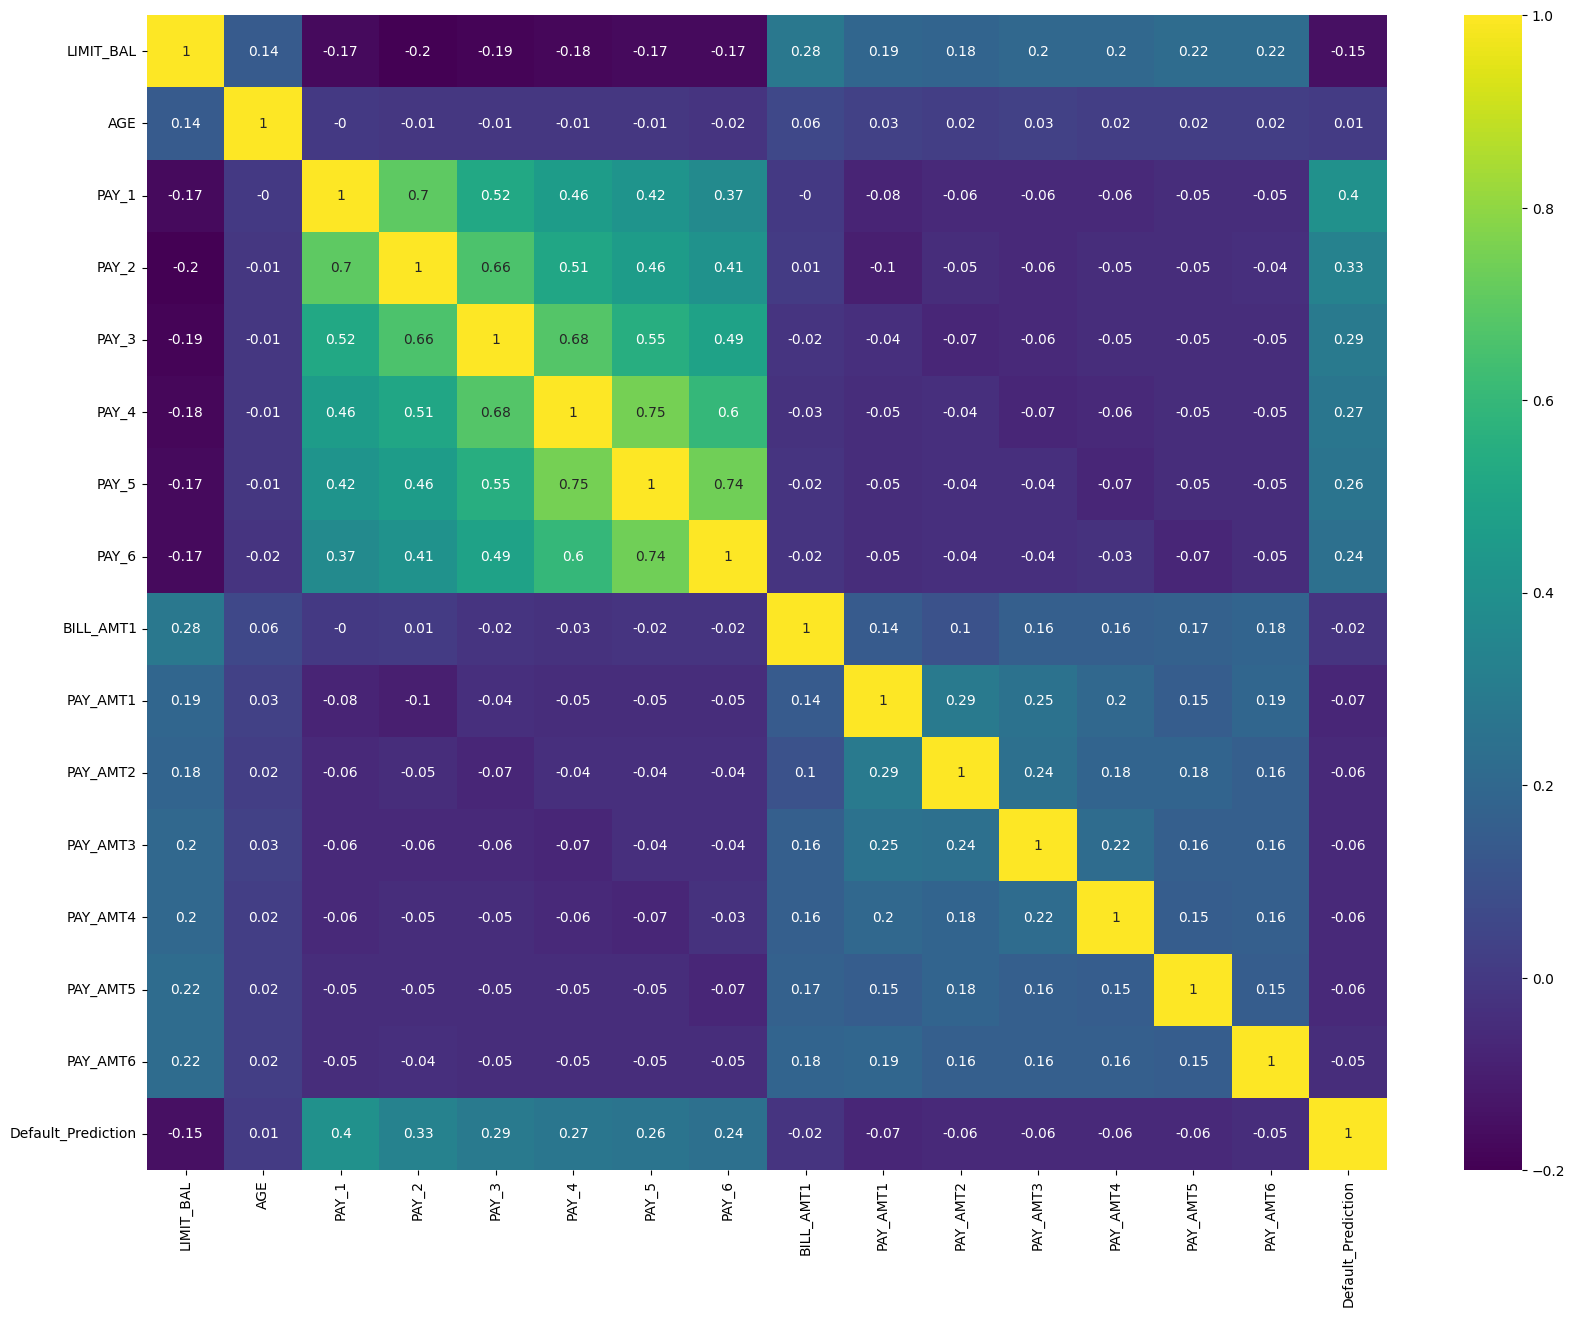

In [75]:
# Assuming 'dataset' is your DataFrame
numeric_dataset = dataset.select_dtypes(include=['number'])  # Select only numeric columns
dst = numeric_dataset.corr().round(2)

plt.figure(figsize=(20, 15))
sns.heatmap(dst, cmap="viridis", annot=True)


* We are having high correction between the BILL_AMT 6 features. Also, PAY_ 6 features.

In [76]:
df_new=dataset.copy().drop(['AGE','LIMIT_BAL','BILL_AMT1','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1)

In [77]:
df_new.head()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Default_Prediction,Limit_bin,Age_bin,BILL_AMT1_bin,BILL_AMT2_bin,BILL_AMT3_bin,BILL_AMT4_bin,BILL_AMT5_bin,BILL_AMT6_bin,PAY_AMT1_bin,PAY_AMT2_bin,PAY_AMT3_bin,PAY_AMT4_bin,PAY_AMT5_bin,PAY_AMT6_bin
0,female,university,married,2,2,0,0,0,0,1,5000-50000,20-25,0-25k,0-25k,0-25k,=0,=0,=0,0<,0-25k,0<,0<,0<,0<
1,female,university,single,0,2,0,0,0,2,1,100000-150000,25-30,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k,0<,0-25k,0-25k,0-25k,0<,0-25k
2,female,university,single,0,0,0,0,0,0,0,50000-100000,30-35,25k-75k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k
3,female,university,married,0,0,0,0,0,0,0,5000-50000,35-40,25k-75k,25k-75k,25k-75k,25k-75k,25k-75k,25k-75k,0-25k,0-25k,0-25k,0-25k,0-25k,0-25k
4,male,university,married,0,0,0,0,0,0,0,5000-50000,50-60,0-25k,0-25k,25k-75k,0-25k,0-25k,0-25k,0-25k,25k-50k,0-25k,0-25k,0-25k,0-25k


In [78]:
df_old=dataset.copy().drop(['Age_bin','Limit_bin','BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin','PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin'], axis=1)

In [79]:
df_old.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Prediction
0,20000.0,female,university,married,24,2,2,0,0,0,0,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,female,university,single,26,0,2,0,0,0,2,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,female,university,single,34,0,0,0,0,0,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,female,university,married,37,0,0,0,0,0,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,male,university,married,57,0,0,0,0,0,0,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [80]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           30000 non-null  float64
 1   SEX                 30000 non-null  object 
 2   EDUCATION           30000 non-null  object 
 3   MARRIAGE            30000 non-null  object 
 4   AGE                 30000 non-null  int64  
 5   PAY_1               30000 non-null  int64  
 6   PAY_2               30000 non-null  int64  
 7   PAY_3               30000 non-null  int64  
 8   PAY_4               30000 non-null  int64  
 9   PAY_5               30000 non-null  int64  
 10  PAY_6               30000 non-null  int64  
 11  BILL_AMT1           30000 non-null  float64
 12  PAY_AMT1            30000 non-null  float64
 13  PAY_AMT2            30000 non-null  float64
 14  PAY_AMT3            30000 non-null  float64
 15  PAY_AMT4            30000 non-null  float64
 16  PAY_

* Just we are checking all the scenarios and possibilities of training and evaluating the data with both df_old and df_new

### df_old

* We have Sex, Education and Marriage with object datatype in df_old. So, converting into numerical datatype.

In [81]:
X=df_old.iloc[:,:-1]
y=df_old.iloc[:,-1]

### Encoding the categorical features

In [82]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2,3])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [83]:
X

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+03, 0.0000e+00,
        2.0000e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        5.0000e+03],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 4.2000e+03, 2.0000e+03,
        3.1000e+03],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.9260e+03, 5.2964e+04,
        1.8040e+03],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        1.0000e+03]])

In [84]:
y=np.array(y)

In [85]:
y

array([1, 1, 0, ..., 1, 1, 1])

## Splitting Dataset into Train and Test set

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
X_train

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 1.218e+03, 1.445e+03,
        8.780e+02],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 9.550e+02, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 6.881e+03, 1.034e+04,
        1.820e+02],
       ...,
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.200e+03, 0.000e+00,
        1.200e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.650e+03, 1.420e+04,
        1.500e+03]])

In [88]:
y_train

array([0, 0, 0, ..., 0, 1, 1])

In [89]:
linreg=LogisticRegression()
linreg.fit(X_train,y_train)

LogisticRegression()

In [90]:
y_pred=linreg.predict(X_test)

In [91]:
print("Accuracy",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("F1-score",f1_score(y_test,y_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))

Accuracy 0.7811666666666667
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000

F1-score 0.0
Confusion matrix
 [[4687    0]
 [1313    0]]


* We got some idea right, since our dataset is imbalnced. Our model predicting only majority type(non defaulters).

In [92]:
# lets just try with RandomForest Classifier
randomf=RandomForestClassifier(n_estimators=100,criterion='entropy')
randomf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [93]:
y_pred1=randomf.predict(X_test)

In [94]:
print("Accuracy",accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print("F1-score",f1_score(y_test,y_pred1))
print("Confusion matrix\n",confusion_matrix(y_test,y_pred1))

Accuracy 0.8178333333333333
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.65      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

F1-score 0.4691597863040311
Confusion matrix
 [[4424  263]
 [ 830  483]]


* We got some better improvement in the performance of the model right. Not-bad

#### Now, we got ideas, what to do for increasing the performance of the model right.. We will list those things..

We have to do,
1. Feature Scaling
2. Balance the dataset (Sampling techniques)
3. Feature selection
4. Hyper-parameter tuning for finding best model and parameters

We will train the model with df_new with the same procedure and let's see we can make any observations..

Then after, we will follow the above steps to make our model performance better.

### df_new

In [95]:
X = df_new.copy().drop('Default_Prediction', axis = 1)
y=df_new['Default_Prediction']

In [96]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   SEX            30000 non-null  object  
 1   EDUCATION      30000 non-null  object  
 2   MARRIAGE       30000 non-null  object  
 3   PAY_1          30000 non-null  int64   
 4   PAY_2          30000 non-null  int64   
 5   PAY_3          30000 non-null  int64   
 6   PAY_4          30000 non-null  int64   
 7   PAY_5          30000 non-null  int64   
 8   PAY_6          30000 non-null  int64   
 9   Limit_bin      30000 non-null  category
 10  Age_bin        30000 non-null  category
 11  BILL_AMT1_bin  30000 non-null  category
 12  BILL_AMT2_bin  30000 non-null  category
 13  BILL_AMT3_bin  30000 non-null  category
 14  BILL_AMT4_bin  30000 non-null  category
 15  BILL_AMT5_bin  30000 non-null  category
 16  BILL_AMT6_bin  30000 non-null  category
 17  PAY_AMT1_bin   30000 non-null  

In [97]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Default_Prediction, Length: 30000, dtype: int64

In [98]:
le = LabelEncoder()
print(pay_amtx_bins)
for col in pay_amtx_bins:
    print(X[col])
    X[col] = le.fit_transform(X[col])
for col in bill_amtx_bins:
    X[col]=le.fit_transform(X[col])
X['Limit_bin']=le.fit_transform(X['Limit_bin'])
X['Age_bin']=le.fit_transform(X['Age_bin'])

['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']
0              0<
1              0<
2           0-25k
3           0-25k
4           0-25k
           ...   
29995       0-25k
29996       0-25k
29997          0<
29998    50k-100k
29999       0-25k
Name: PAY_AMT1_bin, Length: 30000, dtype: category
Categories (5, object): ['0<' < '0-25k' < '25k-50k' < '50k-100k' < '100k-2000k']
0          0-25k
1          0-25k
2          0-25k
3          0-25k
4        25k-50k
          ...   
29995      0-25k
29996      0-25k
29997         0<
29998      0-25k
29999      0-25k
Name: PAY_AMT2_bin, Length: 30000, dtype: category
Categories (5, object): ['0<' < '0-25k' < '25k-50k' < '50k-100k' < '100k-2000k']
0           0<
1        0-25k
2        0-25k
3        0-25k
4        0-25k
         ...  
29995    0-25k
29996    0-25k
29997    0-25k
29998    0-25k
29999    0-25k
Name: PAY_AMT3_bin, Length: 30000, dtype: category
Categories (5, object): ['0<' < '0-25k

In [99]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,2])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [100]:
X

array([[1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 4., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [102]:
X_train[1]

array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 5., 1.,
       2., 2., 2., 2., 0., 4., 0., 0., 0., 0., 1., 1.])

In [103]:
randomf=RandomForestClassifier(n_estimators=100,criterion='entropy')
randomf.fit(X_train,y_train)
y_pred1=randomf.predict(X_test)

In [104]:
print("Accuracy",accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print("F1-score",f1_score(y_test,y_pred1))
print("Confusion matrix\n",confusion_matrix(y_test,y_pred1))

Accuracy 0.7958333333333333
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4687
           1       0.55      0.36      0.44      1313

    accuracy                           0.80      6000
   macro avg       0.69      0.64      0.66      6000
weighted avg       0.77      0.80      0.78      6000

F1-score 0.43626323055683386
Confusion matrix
 [[4301  386]
 [ 839  474]]


* Comparing with df_old and df_new, we got best performance with the dataset df_old. So, as we mentioned before we will be performing some operations to dataset df_old to improve our model performance.

In [105]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           30000 non-null  float64
 1   SEX                 30000 non-null  object 
 2   EDUCATION           30000 non-null  object 
 3   MARRIAGE            30000 non-null  object 
 4   AGE                 30000 non-null  int64  
 5   PAY_1               30000 non-null  int64  
 6   PAY_2               30000 non-null  int64  
 7   PAY_3               30000 non-null  int64  
 8   PAY_4               30000 non-null  int64  
 9   PAY_5               30000 non-null  int64  
 10  PAY_6               30000 non-null  int64  
 11  BILL_AMT1           30000 non-null  float64
 12  PAY_AMT1            30000 non-null  float64
 13  PAY_AMT2            30000 non-null  float64
 14  PAY_AMT3            30000 non-null  float64
 15  PAY_AMT4            30000 non-null  float64
 16  PAY_

In [106]:
X=df_old.iloc[:,:-1]
y=df_old.iloc[:,-1]

### Encoding Categorical Data

In [107]:
le = LabelEncoder()
X['SEX'] = le.fit_transform(X['SEX'])
X['EDUCATION'] = le.fit_transform(X['EDUCATION'])
X['MARRIAGE']=le.fit_transform(X['MARRIAGE'])

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature Scaling

In [109]:
sc=StandardScaler()
X_train[['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = sc.fit_transform(X_train[['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1','PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

In [110]:
X_test[['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = sc.transform(X_test[['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

In [111]:
X_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2308,-1.058400,1,3,2,-1.136374,-0.4682,-0.399773,-0.384148,-0.340674,-0.309049,-0.318521,-0.573077,-0.244136,-0.163118,-0.206019,-0.207358,-0.212487,-0.180973
22404,-0.132624,0,0,2,-1.028090,-0.4682,-0.399773,-0.384148,-0.340674,-0.309049,-0.318521,1.169065,-0.069353,-0.071081,-0.114967,-0.137009,-0.137642,-0.142653
23397,-0.749808,0,1,0,-0.378385,-0.4682,-0.399773,-0.384148,-0.340674,-0.309049,-0.318521,0.261508,-0.189640,-0.117326,-0.123792,-0.149828,-0.148462,-0.149240
25058,-0.286920,1,1,2,1.462444,-0.4682,-0.399773,-0.384148,-0.340674,-0.309049,-0.318521,-0.412122,-0.237697,-0.171025,0.096247,-0.297702,0.140351,-0.043043
2664,-0.904104,0,3,2,0.054751,-0.4682,-0.399773,-0.384148,-0.340674,-0.309049,2.466365,0.589931,-0.214869,-0.183708,-0.233428,-0.188958,-0.308523,-0.238252


### Balancing the datset using sampling techniques

In [112]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
ros = RandomOverSampler(sampling_strategy=0.5)
# resampling X, y
X_train1, y_train1 = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler(sampling_strategy=0.5) 
# resampling X, y                                                                                                                                              
X_train1, y_train1 = rus.fit_resample(X_train, y_train)
print(Counter(y_train1))

Counter({0: 10646, 1: 5323})


In [113]:
smote = SMOTE(sampling_strategy=0.5)
X_train1,y_train1 = smote.fit_resample(X_train,y_train)
print(Counter(y_train1))

Counter({0: 18677, 1: 9338})


* Tried with balancing the dataset with both oversampling and undersampling techniques, but SMOTE technique gives better performance.

### Hyperparameter Tuning with Grid SearchCV for multiple Algorithms

In [114]:
xgc = XGBClassifier(n_estimators=500,max_depth=3,n_jobs=-1, use_label_encoder =False)
xgc.fit(X_train1,y_train1)
predict = xgc.predict(X_test)

In [115]:
print('Accuracy --> ',accuracy_score(y_test,predict))
print('F1 Score --> ',f1_score(y_test,predict))
print('Classification Report  --> \n',classification_report(y_test,predict))
print(pd.crosstab(y_test,predict))

#ROC-AUC score
auc_score = roc_auc_score(y_test, predict)
print('ROC-AUC Score:',auc_score)

Accuracy -->  0.8101666666666667
F1 Score -->  0.4777624942686841
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.85      0.93      0.88      4687
           1       0.60      0.40      0.48      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.66      0.68      6000
weighted avg       0.79      0.81      0.80      6000

col_0                  0    1
Default_Prediction           
0                   4340  347
1                    792  521
ROC-AUC Score: 0.6613833274483016


In [116]:
rforest=RandomForestClassifier(n_estimators=10, max_depth=3, criterion='entropy',random_state=0)
rforest.fit(X_train1,y_train1)
predict=rforest.predict(X_test)

In [117]:
print('Accuracy --> ',accuracy_score(y_test,predict))
print('F1 Score --> ',f1_score(y_test,predict))
print('Classification Report  --> \n',classification_report(y_test,predict))
print(pd.crosstab(y_test,predict))

#ROC-AUC score
auc_score = roc_auc_score(y_test, predict)
print('ROC-AUC Score:',auc_score)

Accuracy -->  0.813
F1 Score -->  0.4692526017029328
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.84      0.93      0.89      4687
           1       0.62      0.38      0.47      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.80      6000

col_0                  0    1
Default_Prediction           
0                   4382  305
1                    817  496
ROC-AUC Score: 0.6563436225784368


In [118]:
gboost=GradientBoostingClassifier()
gboost.fit(X_train1,y_train1)
predict=gboost.predict(X_test)

In [119]:
print('Accuracy --> ',accuracy_score(y_test,predict))
print('F1 Score --> ',f1_score(y_test,predict))
print('Classification Report  --> \n',classification_report(y_test,predict))
print(pd.crosstab(y_test,predict))

#ROC-AUC score
auc_score = roc_auc_score(y_test, predict)
print('ROC-AUC Score:',auc_score)

Accuracy -->  0.8165
F1 Score -->  0.49332719742291764
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      4687
           1       0.62      0.41      0.49      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.67      0.69      6000
weighted avg       0.80      0.82      0.80      6000

col_0                  0    1
Default_Prediction           
0                   4363  324
1                    777  536
ROC-AUC Score: 0.6695490321709463
